In [83]:
# execute this cell before you start

import tensorflow as tf
from tensorflow.keras import layers
import tensorflow.keras as keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(tf.keras.__version__)


2.6.0
2.6.0


#  CA2

to submit the assignment, please do the following:

- make sure that the notebook runs through and produces all desired output after `Kernel -> Restart & Run all`
- running through the whole notebook must not take no more than 60 minutes on a standard computer, similar to our lab-computers, without GPU and 8GB of RAM
- do `Cell -> All output -> Clear` to clear all your output
- save the notebook (CA2.ipynb)
- upload the file `CA2.ipynb` to canvas.
- note that Google Colab ipynb files do not work with the nbgrader system I use to grade assignments and are therefore not allowed. 


# Q1 The CIFAR-10 dataset.

(10 marks)

Consider the data in  [`keras.datasets.cifar10`](https://www.tensorflow.org/datasets/catalog/cifar10) and train a network which reliably categorizes the data. 
Try to understand tradeoffs:

- What increases computing time?
- What increases accuracy?

This dataset has its own [Wikipedia page](https://en.wikipedia.org/wiki/CIFAR-10), and is often used as benchmark for new proposed methods. 
You can take the cat/dog example from the lecture as a starting point, but you can also find plenty of inspiration in the Internet.  As before, it is not forbidden to get such inspiration, but please stay in the framework of what is covered in the lecture and clearly cite from where you take what. 


To get you started, here some code to show with which you can browse the data:

In [2]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

(train_data,train_labels),(test_data,test_labels) = keras.datasets.cifar10.load_data()


from ipywidgets import interact

@interact(k=(0, len(train_data)-1))
def myplot(k):
    fig, ax = plt.subplots(figsize=(1, 1))
    ax.set_title(labels[train_labels[k][0]])
    ax.imshow(train_data[k])

interactive(children=(IntSlider(value=24999, description='k', max=49999), Output()), _dom_classes=('widget-int…

# 1.1 Exploring the data

The training data comprises a 4 dimensional array, with a shape of (50000, 32, 32, 3), meaning it contains 50000 arrays (images), each of which are 32 x 32 pixels, with 3 channels representing the RGB colour model of the image.

In [3]:
train_data.shape

(50000, 32, 32, 3)

Taking a closer look at a particular image array, this sepcific array shape can be clearly observed.

Below is one image array of arrays:

In [4]:
train_data[4]

array([[[170, 180, 198],
        [168, 178, 196],
        [177, 185, 203],
        ...,
        [162, 179, 215],
        [158, 178, 214],
        [157, 177, 212]],

       [[168, 181, 198],
        [172, 185, 201],
        [171, 183, 200],
        ...,
        [159, 177, 212],
        [156, 176, 211],
        [154, 174, 209]],

       [[154, 170, 186],
        [149, 165, 181],
        [129, 144, 162],
        ...,
        [161, 178, 214],
        [157, 177, 212],
        [154, 174, 209]],

       ...,

       [[ 74,  84,  80],
        [ 76,  85,  81],
        [ 78,  85,  82],
        ...,
        [ 71,  75,  78],
        [ 68,  72,  75],
        [ 61,  65,  68]],

       [[ 68,  76,  77],
        [ 69,  77,  78],
        [ 72,  79,  78],
        ...,
        [ 76,  80,  83],
        [ 71,  75,  78],
        [ 71,  75,  78]],

       [[ 67,  75,  78],
        [ 68,  76,  79],
        [ 69,  75,  76],
        ...,
        [ 75,  79,  82],
        [ 71,  75,  78],
        [ 73,  77,  80]]

The dimensions within the image array are 32x32 and 3 RGB colour channels:

In [5]:
train_data[4].shape

(32, 32, 3)

By examining the first 32x32 array in the image array, the 3 channels for RGB colour specification can be seen:

In [6]:
train_data[4][0]

array([[170, 180, 198],
       [168, 178, 196],
       [177, 185, 203],
       [183, 193, 211],
       [181, 196, 218],
       [177, 195, 220],
       [181, 195, 223],
       [184, 192, 223],
       [189, 190, 223],
       [189, 189, 222],
       [188, 193, 224],
       [183, 194, 223],
       [182, 194, 223],
       [184, 191, 222],
       [184, 190, 227],
       [180, 185, 226],
       [177, 187, 223],
       [177, 188, 223],
       [177, 188, 223],
       [176, 187, 222],
       [175, 186, 221],
       [175, 187, 221],
       [173, 185, 220],
       [170, 185, 221],
       [169, 185, 221],
       [168, 184, 220],
       [166, 182, 218],
       [163, 179, 215],
       [163, 179, 215],
       [162, 179, 215],
       [158, 178, 214],
       [157, 177, 212]], dtype=uint8)

What does this specific 4 dimensional image array actually represent? We can see this by plotting the array:

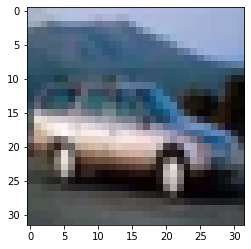

In [7]:
plt.imshow(train_data[4])

The training label assigned to this image array is 1, which corresponds to the written label, 'automobile', from above:

In [8]:
train_labels[4][0], labels[train_labels[4][0]]

(1, 'automobile')

The testing data has similar shape dimensions (as expected), but only contains 10000 testing images, each of which are 32x32 pixels with 3 channels.

In [9]:
test_data.shape

(10000, 32, 32, 3)

# 1.2 Preprocessing

### 1.2.1 Correct Labels:

From browsing the data using the interaction widget above, we can see that the training data appears to be labelled correctly in each dataset. We can also take a look at the testing data to ensure the same.

In [10]:
@interact(k=(0, len(test_data)-1))
def myplot(k):
    fig, ax = plt.subplots(figsize=(1, 1))
    ax.set_title(labels[test_labels[k][0]])
    ax.imshow(test_data[k])

interactive(children=(IntSlider(value=4999, description='k', max=9999), Output()), _dom_classes=('widget-inter…

All the data appears to be labelled correctly so we can proceed with further preprocessing steps.

### 1.2.2 Normalization:
Before inputting data to the learning model, it must be normalized to values between 0 and 1, and so both the training and testing data is divided by a value of 255.

In [11]:
np.min(train_data[4]), np.max(train_data[4])

(0, 254)

In [12]:
np.min(test_data[4]), np.max(test_data[4])

(6, 220)

In [13]:
# Must normalize the data to range 0-1

train_norm = train_data / 255.0
test_norm = test_data / 255.0

The data is now normalized and in correct format for training and testing.

In [14]:
np.min(train_norm[4]), np.max(train_norm[4])

(0.0, 0.996078431372549)

In [15]:
np.min(test_norm[4]), np.max(test_norm[4])

(0.023529411764705882, 0.8627450980392157)

### 1.2.3 Training/validation split:
  
Before training the model, a validation subset of the training images data is established. I have set the validation data to consist of the first 10000 images from the 50000 total images in the training dataset (20% of the dataset size). Therefore, the model will train on 40000 images at each epoch and will also test itself on the remaining 10000 images of the validation data. This will provide an insight into how the model is performing in terms of minimizing the loss function and overall accuracy, similar to testing the model with unseen data.

In [16]:
# training data and validation data

train_N=10000 # 20% of the data for validation

x_val = train_norm[:train_N]
x_train = train_norm[train_N:]

y_val = train_labels[:train_N]
y_train = train_labels[train_N:]

### 1.2.4 Data Augmentation:

In an attempt to prevent overfitting, I will be training the constructed model on both the normal training data, but also a set of augmented training data, to see if testing accuracy can be improved with this dataset. By randomly flipping images horizontally, as well as randomly rotating images by 36 degrees, the model can be trained on a larger set of images and hopefully improve testing accruacy. The modified images are still new to the machine as it learns, and should not negatively affect how it recognizes the distinguishable features of an 'automobile' or a 'frog' for example.

Training and validation subsets were again created for this augmented data in order to assess model performance during training. The folllowing code is adapted from the TensorFlow website tutorial 'Working with preprocessing layers' at https://www.tensorflow.org/guide/keras/preprocessing_layers. This implements a data_augmentation pre processing model that can modify the selected training and validation images from the previous cell above. The images are converted into a MapDataset object, and the image data augmentation layers will only be active during training.

In [17]:
# From TensorFlow tutorial - Working with preprocessing layers
# Create a tf.data pipeline of augmented images (and their labels)

data_augmentation = keras.Sequential(
    [
        keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        keras.layers.experimental.preprocessing.RandomRotation(0.1)
    ]
)

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.batch(16).map(lambda x, y: (data_augmentation(x), y))

valid_data = tf.data.Dataset.from_tensor_slices((x_val, y_val))
valid_data = valid_data.batch(16).map(lambda x, y: (data_augmentation(x), y))


2022-03-07 09:28:19.969634: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-07 09:28:19.970555: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [18]:
type(train_dataset)

tensorflow.python.data.ops.dataset_ops.MapDataset

# 1.3 Model Design

For this machine learning model, we wish to construct a convolutional neural network (CNN) that can reliably categorize unseen image data relating to 10 distinct image labels. This model must also strike a balance between computational efficiency and overall accuracy. I was particularly interested in investigating how augmentation could affect the training time and overall testing accuracy of a model. 

Below I have explained the architecture of the final model I have chosen for this classification task. My aims with this model were to achieve a testing accuracy of at least 70%, a model fitting time of approximately 5 minutes, and to try to reduce overfitting as much as possible.

To do this, I decided to stack the layers sequentially using the keras.Sequential() function, starting with an empty model and adding layers one by one afterwards. I have chosen to use this method rather than the functional API as I wished to keep the model relatively simple without the need for a complex structure. If more complex and intricate network layering was required, the functional API method of model construction would be more beneficial, but would likely result in a more lengthy computational time per epoch.

The design for this model was inspired by the code presented in the following CNN tutorials:

https://www.tensorflow.org/tutorials/images/cnn

https://www.kaggle.com/amyjang/tensorflow-cifar10-cnn-tutorial

https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/ 

The layers in the model can be described together in blocks:

#### Block 1 - Conv2D (x2) and MaxPooling2D()
The first block of layers consists of two 2D convolutional layers. Convolutional layers are being used here as they are much more suited to image processing than simpler dense layered networks. Convolutional layers allow spatial information to be processed, meaning the model can recognise distinguishable features wherever they are to appear in an image. For example, the model is no longer just learning that an image of a frog is always associated with a feature at the bottom left of an image, it can now recognise the image of a frog no matter where those distinguishable features occur. 

The convolutional layer processes this information using kernel convolution. The kernel/filter is of a specified dimension and contains values that will be continously updated as the model trains itself. The number of filters to use is also specified. Each time the kernel has been applied over the complete image, a 2D feature map is generated. In this model, the first coupled block of convolutional layers each contains 32 filters/kernels, with a kernel size of 3x3. 

Once the feature map has been generated for each kernel, this information is then processed by the activation function, in this case being 'relu' or 'rectified linear unit activation function'. The activation function introduces the non-linearity into the model which is necessary for the model to be trained and to learn the relationships between the data, mainly assessing whether a particular image feature is actually present at a certain position in the image. 

In order to account for image edges during convolution, padding is applied, preventing the 2D feature maps from being downscaled to a smaller size than the original image. Here the padding was specified as 'same' for both layers, meaning the feature maps produced as ouput will be of the same size as the original input image.


Overall the output from each convolutional layer will be 3D, as each filter is associated with a 2D feature map output. The next layer in the first block is MaxPooling2D(), which aids in reducing the spatial size of this 3D convolved feature object. By reducing the dimensions of this output, the machine requires less computational power, but it also allows for the most dominant features to be identified and retained as the model trains. Max pooling does this by returning the maximum values from the feature maps, which will then feed into the next layer of the model as input.

#### Dropout Layer 1
A dropout layer prevents a certain fraction of the inputs from getting to the next layer. It does this by blocking/dropping nodes from the network at random. This forces the network to not rely on the previous layer or specific nodes, and thus may help suppress overfitting as the model is now more likely to look for generic features rather than just remembering specific features processed by a particular node. Here I specified a dropout of 20%.

#### Block 2 - Conv2D (x2) and MaxPooling2D()
The second block of layer consists of the same structure as block 1, but has a larger number (64) of kernels specified within each 2D convolutional layer. By increasing the number of filters, I hoped that the model would be able to recognise more complex features within the images, but I made sure not to specify too high a value, as I wanted the model to run relatively quickly and wished to keep the design straightforward. 

#### Dropout Layer 2
A second dropout layer was added, again with a dropout of 20%.

#### Block 3 - Flatten(), Fully Connected Dense Layer and Ouput Dense Layer
In the final layer of the model, I flattened the output from the MaxPooling2D() of the previous layer block, enabling the convolved output to be in a sutiable format for classification. A dense layer consisting of 128 nodes/neurons was then added in order to have a fully connected layer right before the final classification process.
The final layer of the matrix is another dense layer, with 10 nodes representing the 10 possible outputs (image categories). When the model has been successfully trained, this layer will assess whether the input of a '2' image is given by the correct output number label (0-9), i.e. does the image input match the correct index number of the output. The activation function chosen here is 'softmax', which enables the output from this layer to be interpeted as a probability distribution. Each output will be assigned a probability distribution, with the highest probability value corresponding to the category which the model beleives it is seeing from the input. For example, when the model is shown a 5, the highest probability value should be in position 5 of the ouput nodes if it has made the correct prediction.

References:

https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac

https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

In [19]:
# The design for this model was inspired by the code presented in the following CNN tutorials:
# https://www.tensorflow.org/tutorials/images/cnn
# https://www.kaggle.com/amyjang/tensorflow-cifar10-cnn-tutorial
# https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/ 

def make_cnn(input_shape, num_classes):

    model = keras.Sequential()                       

    # BLOCK 1 - First set of convolutional layers
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape= input_shape))
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(keras.layers.MaxPooling2D((2, 2)))

    # DROPOUT 1
    model.add(keras.layers.Dropout(0.2))

    # BLOCK 2 - Second set of convolutional layers
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(keras.layers.MaxPooling2D((2, 2)))

    # DROPOUT 2
    model.add(keras.layers.Dropout(0.2))
    
    # BLOCK 3 - Output
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(num_classes, activation='softmax'))
    
    return model

The model was made into a function, making it more efficient to call this function later instead of repeating the code of the model creation again before training a new model. The model layers can be observed in more detail below. There are 591,274 trainable paramaters in total for this model, a high number of paramaters, but I felt it balanced computation time and accuracy quite well. 

In [20]:
cifar_model = make_cnn(input_shape = (32,32,3), num_classes=10)

cifar_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)         

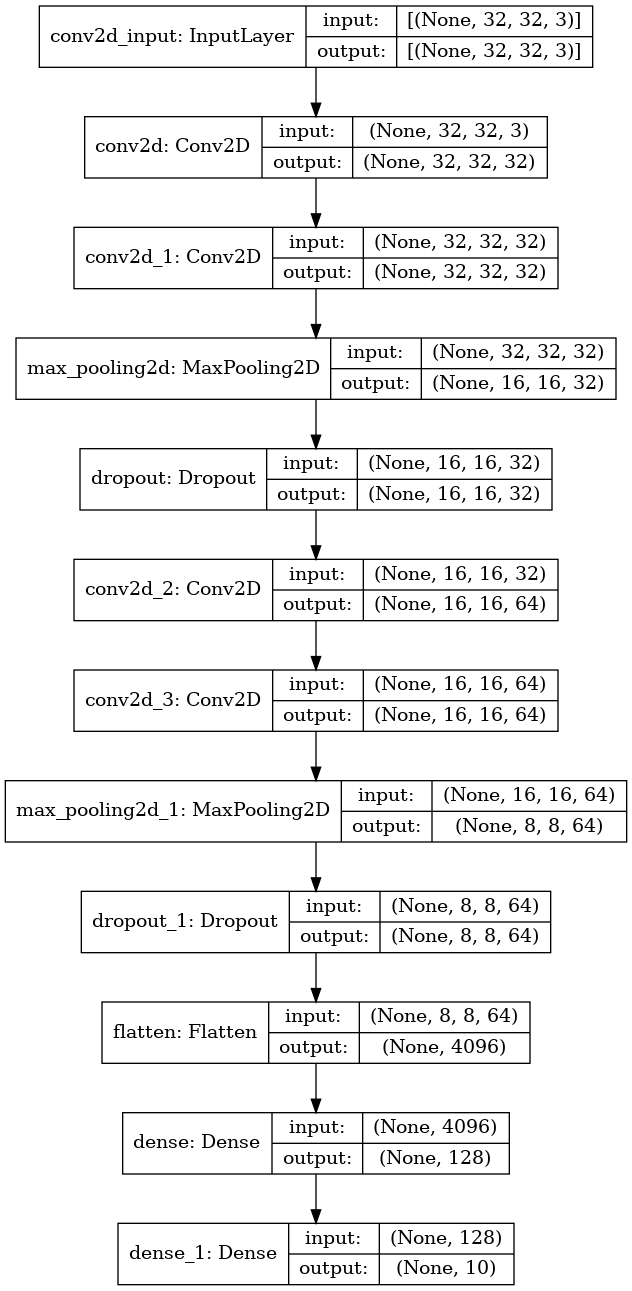

In [21]:
keras.utils.plot_model(cifar_model, show_shapes=True)

## 1.4 Training the Model

### 1.4.1 Original image dataset (no augmentation)

As with the previous assignment, the adaptive optimizer 'adam' and the loss function 'sparse_categorical_crossentropy' were used when compiling the model. I believe both of these were best suited for the sparse categorical image data. A learning rate of 0.001 was used, as it was found to produced the best results in this time restriction. It was large enough value to minimise the cost function at a steady computational speed, while also not being too large to overshoot the optimimum minimisation or too small where minimiisation would take too long.

A batch size of 128 was used, again to improve computational efficiency. As mentioned, I wished to achieve a relatively good accuracy of >70% with a run time of less than 5 minutes. Therefore, I set the number of epochs to 5, and each epoch seemed to take less than 50 seconds to run.

In [22]:
cifar_model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

cifar_fit = cifar_model.fit(x_train, y_train, epochs=5,
                   batch_size=128, validation_data=(x_val, y_val), verbose=1) 
    

2022-03-07 09:28:41.430912: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
313/313 [==============================] - 46s 143ms/step - loss: 1.5881 - accuracy: 0.4219 - val_loss: 1.2681 - val_accuracy: 0.5494
Epoch 2/5
313/313 [==============================] - 45s 145ms/step - loss: 1.1843 - accuracy: 0.5794 - val_loss: 1.0422 - val_accuracy: 0.6259
Epoch 3/5
313/313 [==============================] - 45s 144ms/step - loss: 0.9813 - accuracy: 0.6544 - val_loss: 0.9562 - val_accuracy: 0.6638
Epoch 4/5
313/313 [==============================] - 46s 146ms/step - loss: 0.8732 - accuracy: 0.6931 - val_loss: 0.8379 - val_accuracy: 0.7020
Epoch 5/5
313/313 [==============================] - 45s 143ms/step - loss: 0.7752 - accuracy: 0.7257 - val_loss: 0.7871 - val_accuracy: 0.7254


### 1.4.2 Augmented image dataset 

Here the same model was now trained on the augmented image data set, containig a larger number of images in both the training and validation set.

The model was compiled using the same parameters and was fitted using the default batch size and 2 epochs. This was to keep the computation time relatively similar to above, in order to better compare the training of both models. 

In [23]:
aug_cifar = make_cnn(input_shape = (32,32,3), num_classes=10)

aug_cifar.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

aug_cifar_fit = aug_cifar.fit(train_dataset, epochs = 2, validation_data= valid_data)

Epoch 1/2
2500/2500 [==============================] - 124s 49ms/step - loss: 1.6234 - accuracy: 0.4105 - val_loss: 1.3183 - val_accuracy: 0.5213
Epoch 2/2
2500/2500 [==============================] - 125s 50ms/step - loss: 1.3072 - accuracy: 0.5331 - val_loss: 1.1496 - val_accuracy: 0.5871


## 1.5 Model Assessment

### 1.5.1 Testing accuracy

Upon completion of training, the original model (cifar_model) produced an accuracy of 0.7275, and a validation accuracy of 0.7253, which is reasonably good considering the relative simplicity of the model design and the reduction in computation time, while also taking into account the complexity and variation of images we are dealing with. 

In a similar computation time, the augmentend model (aug_cifar) produced an accuracy of 0.5988, and a validation accuracy of 0.6553, which is a poor result. 

Both models had a consistent reduction in the loss function output throughout training, and it would have been interesting to train each for a longer duration in order to identify at what point would this reduction would begin to plateau, or how long it would take to achieve high accuracy (or a plateau). 

Below I have plotted the training and validation loss/accuracy for each model:

In [24]:
def plot_training(model_fit, history_dict):
    
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    epochs = model_fit.epoch 

    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    # Plotting training vs validation loss across the 5 epochs
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1,2,2)
    # Plotting training vs validation accuracy across the 5 epochs
    plt.plot(epochs, acc, 'go', label='Training acc')
    plt.plot(epochs, val_acc, 'g', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()


### Training original data

We can see from the plot of the original training that the model actually outperformed itself when being assessed on the validation subset of images. The validation loss and accuracy improve upon the training results, which is a very positive sign. This high performance on unseen data may be as a result of using the dropout layers, allowing the model to actually learn correctly as it trains, recognising distinct features rather than memorising. 

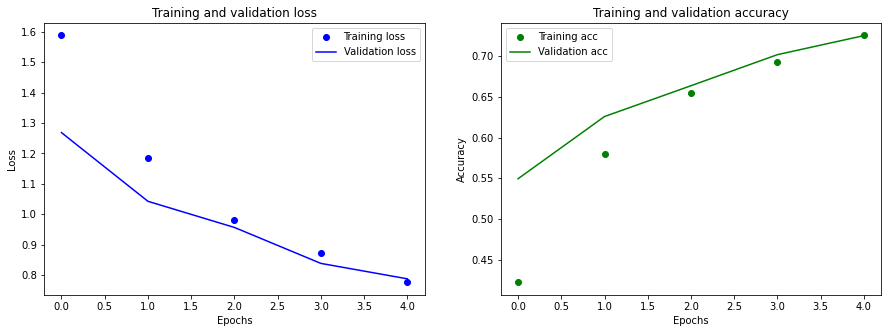

In [25]:
test_dict = cifar_fit.history
plot_training(cifar_fit, test_dict)

### Evaluating the original model

After testing this model on the testing image data, a testing accuracy of 72.35% was produced. This is quite a good result, again considering the simplicity of the model and the complexity of the data at hand. It also proves that the stepstaken to prevent overfitting worked reasonably well, despite a high number of trainable paramaters. The model produced encouraging accuracy % when dealing with unseen data, generating both a final training validation accuracy and testing accuracy of >70%. This was also produced without the need for data augmentation.

In [26]:
test_loss, test_acc = cifar_model.evaluate(test_norm, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 6s 20ms/step - loss: 0.8008 - accuracy: 0.7188
Test accuracy: 0.7188000082969666


### Training augmented data

A similar pattern can be seen for the augmented data, albeit only for a duration of two epochs. Longer training duration may have lead to a continuation in this high validation performance, but it also may have plateaued quite quickly. The large number of images was likely the cause for computation time being increased, and thus any further epochs would have lead to a lengthy computational time, and possibly not a very efficient model. The model performed well enough without augmentation, with the augmented images actually resulting in a decrease in training accuracy. A possible reason for this could be due to the fact that the model design was too simple, and if it was getting the otiginal images wrong, it was just getting their augmented versions wrong also, leading to poorer overall performance with the larger image dataset. 

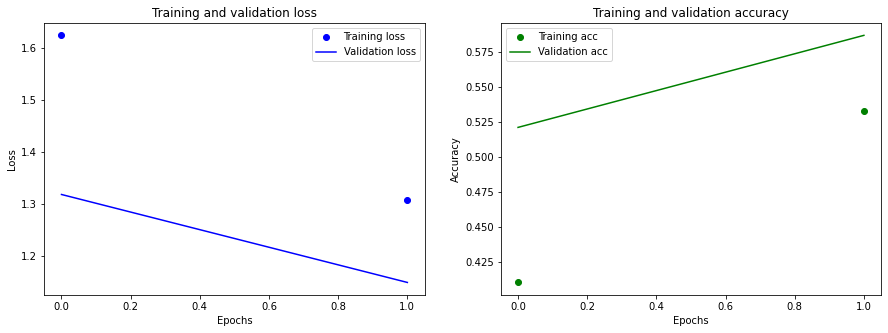

In [27]:
augtest_dict = aug_cifar_fit.history
plot_training(aug_cifar_fit, augtest_dict)

### Evaluating the augmented model

After testing this model on the testing image data, a testing accuracy of ~60% was produced. In comparison to the original model, this is not a strong result. Overall, augementation has resulted in longer computation time and less testing accuracy. Therefore the orginal model is the better of the two. However, it is interesting to note that the augmented model achieved a testing accuracy that was higher than the training and validation accuracy from above, again reinforcing the models ability to deal with unseen data. With a longer computation time (larger number of epochs), the augmented model may have performed quite well and would potentially have been less prone to overfitting. Only 2 epochs were used intraining for this model, as I did not want the notebook to have a very large overall run time and wished to see how the augmented model compared to the original model across a similar time period. 

In [28]:
aug_loss, aug_acc = aug_cifar.evaluate(test_norm, test_labels)

print('Test accuracy:', aug_acc)

313/313 [==============================] - 6s 21ms/step - loss: 1.1095 - accuracy: 0.6072
Test accuracy: 0.607200026512146


### 1.5.2 Predictions

For the model predictions, the original model will be used as it was clearly the better performing of the two.

In [29]:
predict = cifar_model.predict(test_data)

Taking a look at one image in particular, we can see the model correctly predicted it as being a frog.

In [30]:
np.argmax(predict[5]), labels[np.argmax(predict[5])]

(6, 'frog')

(<matplotlib.image.AxesImage at 0x7f185abe0eb0>,
 array([6], dtype=uint8),
 'frog')

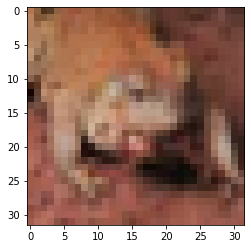

In [34]:
plt.imshow(test_norm[5]), test_labels[5], labels[test_labels[5][0]]

Below is an example of a inaccurate prediction, where the model believes it is seeing an airplane, but in fact it is actually a ship. 

In [40]:
np.argmax(predict[2]), labels[np.argmax(predict[2])]

(0, 'airplane')

(<matplotlib.image.AxesImage at 0x7f185aaa10a0>,
 array([8], dtype=uint8),
 'ship')

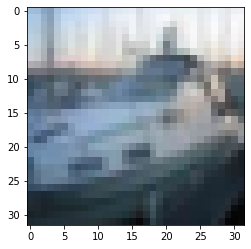

In [39]:
plt.imshow(test_norm[2]), test_labels[2], labels[test_labels[2][0]]

Each of the 10 outputs in the predict array is an array with 10 elements. This represents the probability distribution for each possible category prediction, with the index of the highest probability corresponding to the model's best estimate for the correct category. 

In [43]:
predict.shape

(10000, 10)

Now we can try and extract the best and worst prediction, the best being the highest probability value among all correct predictions, and the worst being the highest proability value among all incorrect predictions (where the computer was confidently incorrect).

In [49]:
# code adapted from previous assignment
# establish a dictionary for each with some details

best_pred = {'image':0, 'prediction':0, 'correct':0, 'probability': 0}
worst_pred = {'image':0, 'prediction':0, 'correct':0, 'probability': 0}

# index through 0-10000
for i in range(len(predict)):
    # if the predicted category value = correct category value AND the max value at this position is greater
    # than the value in the best_pred dict, fill in the necessary details
    if np.argmax(predict[i]) == test_labels[i] and np.max(predict[i]) > best_pred['probability']:
        best_pred['image'] = i   
        best_pred['prediction'] = labels[np.argmax(predict[i])]
        best_pred['probability'] = np.max(predict[i])
        best_pred['correct'] = labels[test_labels[i][0]]
    # elif do the same but with the mismatched predictions and assign details to worst_pred dict
    elif np.argmax(predict[i]) != test_labels[i] and np.max(predict[i]) > worst_pred['probability']:
        worst_pred['image'] = i
        worst_pred['prediction'] = labels[np.argmax(predict[i])] 
        worst_pred['probability'] = np.max(predict[i])
        worst_pred['correct'] = labels[test_labels[i][0]]
        

In [50]:
print('The best prediction:', best_pred)
print('The worst prediction:', worst_pred)

The best prediction: {'image': 0, 'prediction': 'cat', 'correct': 'cat', 'probability': 1.0}
The worst prediction: {'image': 4, 'prediction': 'ship', 'correct': 'frog', 'probability': 1.0}


#### Best Prediction

The  model predicted with 100% certainty that the image below was a cat. This is quite an impressive prediction, as I'm unsure if a human would be able to predict this correctly.

In [57]:
np.argmax(predict[0]), labels[np.argmax(predict[0])] # prediction

(3, 'cat')

(<matplotlib.image.AxesImage at 0x7f185af0b520>,
 array([3], dtype=uint8),
 'cat')

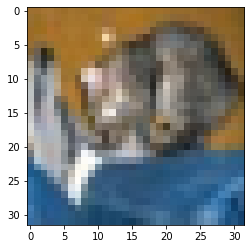

In [58]:
plt.imshow(test_norm[0]), test_labels[0], labels[test_labels[0][0]] # actual

#### Worst Prediction

Here the  model predicted with 100% certainty that the image below was a ship. This definitely warrants the 'worst prediction' title, as is quite a clear image of a frog. A human would defintiely predict this image correctly.

In [59]:
np.argmax(predict[4]), labels[np.argmax(predict[4])]

(8, 'ship')

(<matplotlib.image.AxesImage at 0x7f18585ddd90>,
 array([6], dtype=uint8),
 'frog')

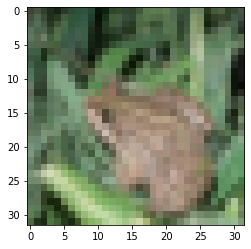

In [56]:
plt.imshow(test_norm[4]), test_labels[4], labels[test_labels[4][0]]

#### Interactive look at each  image prediction 

In [60]:
# code adapted from L04

sortedindices = range(len(predict))

from ipywidgets import interact

@interact(n=(0,len(predict)-1))
def myf(n):
    i = sortedindices[n]
    print(f"index: {i}; test_label {test_labels[i][0], labels[test_labels[i][0]]}; Prediction: {np.argmax(predict[i]), labels[np.argmax(predict[i])]}")
    print()
    fig, ax = plt.subplots(figsize=(1, 1))
    ax.set_title(labels[test_labels[i][0]])
    ax.imshow(test_data[i])
    

interactive(children=(IntSlider(value=4999, description='n', max=9999), Output()), _dom_classes=('widget-inter…

## 1.6 Final Comments

Similar to the previous 'newswires' assignment, the model is definitely more reliable than unreliable, but is still ~28% likely to predict the wrong category. This is too high a value and thus is a significant limitation of the model. 

I opted for a simple and straightforward model and one with a clear and understandable structure. Taking this into account, I believe the model performed well with unseen data. This was particularly evident from the improved accuracy achieved with the validation dataset and the testing dataset, in comaprison to the final accuracy achieved during training. As mentioned, the reason for this may be due to the dropout layers that were added between 'blocks' of layers, with a dropout specification of 0.2 proving to work best. The dropout layers (and maybe the lower number of epochs) aided in preventing overfitting from occuring, allowing the model to learn efficiently as it trained, without relying on a certain node(s). 

The difficulty in achieving a high testing accuracy value does make sense when considering the data we are dealing with. The images are complex, with certain categories of images appearing very similar to other categories. For example, 'dog' and 'cat', 'bird' and'plane'. It is understandable that the model might predict these images incorrectly, as it struggles to idenitfy distinguishable features. Additionally, some of these images in particular would be difficult even for humans to predict, as they appear blurry and undefined. Therefore, >70% accuracy is not the worst, but the model should be developed further. 

Other images are just very poorly predicted, and that is likely due to the model design. For the complexity of data involved, a more intricate model would be required. That is where the functional API may be of use, enabling a more complex model to be constructed. A more detailed model could be able to process subtle feature differences between categories, especially those that appear to overlap. However, making the model more complicated will also increase computation time, and may not result in signifcant improvements in accuracy. 

While trying to strike a balance between computation time and testing accuracy, I tried to incorporate several other network layers into the model, but they were ultimately excluded. 

- Further layer 'blocks', with a larger number of filters (128) - similar accuracy but longer computation time.
- Batch normalization layers - better initial training accuracy but pleateaud earlier at a lower accuracy.
- Separable convolutional 2D layer - similar accuracy and signficantly longer computation time.
- extra dropout or dropout of 0.5 - no change in accuracy - longer computation time.


Interestingly, augmenting the data actually decreased testing accuracy overall, but unsurprisingly increased computation time significantly. As mentioned, if a longer computation time was permitted or more suitable, it would have been interesting to see how the model could be altered and improved to deal with this augmented data. It is very likely that the images the model was incorrectly predicting before augmentation were also having most of their augmented versions (fipped and rotated) incorreclty predicted, resulting in lower overall accuracy. The augmentation may have prevented overfitting, as the testing accuracy was higher than training accuracy, but the dropout layers in the original model were already performing well in that case. Therefore, I don't believe augmentation was necessary for this model training. With 50,000 training images being sufficient, more focus should be applied on the model design.


# Q2 Predicting the Weather with RNNs.

(10 marks)

We would like to predict the weather using RNNs.  Have a look at the following [tutorial notebook](https://www.tensorflow.org/tutorials/structured_data/time_series)
which explains how to work with the data for the German region of Jena.  (Right-click and "Save Link As". You might also need to install pandas and seaborn using `pip install ...`). 

Focus on the prediciton part of the tutorial.  Try to train the model to predict the weather for two days in advance.  What are the parameters which influence the prediction accuracy.  For each cell that you add, start it with a line `# CA` (both for text and code cells).  Always explain what you are trying to achieve. 

Try to find similar weather data for Cork and train a model which is able to predict the weather for the two days after the submission deadline.

## 2.1. Importing Libraries/Defining Functions

In [84]:
# CA 
import os
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

All functions (unless otherwise specified) were taken from the TensorFlow 'Time series forecasting' tutorial at https://www.tensorflow.org/tutorials/structured_data/time_series

In [85]:
# CA

class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df, val_df, test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [86]:
# CA

def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [87]:
# CA

def plot(self, model=None, plot_col='temp', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [88]:
# CA

def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [89]:
# CA

@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [119]:
# CA

def compile_and_fit(model, window, patience=2, epochs = 1):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

  history = model.fit(window.train, epochs=epochs,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history


In [120]:
# CA

class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [109]:
# CA
# My own function for preprocessing of data - splitting and normalaizing data as seen in the TensorFlow tutorial

def split_norm(df, train = 0.7, val = 0.2, test = 0.1):
    
    # splitting 
    column_indices = {name: i for i, name in enumerate(df.columns)}

    n = len(df)
    train_df = df[0:int(n*train)]
    val_df = df[int(n*train):int(n*(train + val))]
    test_df = df[int(n*(1-test)):]

    num_features = df.shape[1]
    
    # normalizing
    train_mean = train_df.mean()
    train_std = train_df.std()

    train_df = (train_df - train_mean) / train_std
    val_df = (val_df - train_mean) / train_std
    test_df = (test_df - train_mean) / train_std
    
    return train_df, val_df, test_df, num_features

## 2.2. Tutorial Data (Jena Region - Germany)

### 2.2.1 Preprocessing


#### Observing the data
Before constructing the model, we must take a look at the data and carry out some preprocessing if necessary.

In [93]:
# CA
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

The file is read in using pandas 'pd.read_csv' function.

In [94]:
# CA
df = pd.read_csv(csv_path)

When viewing the dataframe, we can see that there are 15 columns in total, each representing a particular feature of the weather. The masurements for each feature can be observed in the table cells. Date Time is a feature representing the time at which each other feature was recorded, and is measured in 10 minute intervals from January 2009 to 1st January 2017.

In [95]:
# CA
df 

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


#### Subsetting the data
For this assignment, I will just be taking a subsection of this data to work with, so I can build a simplified, more understandable weather prediction. Also, a couple of these features are present in my weather dataset for Cork so I wanted to remain consistent across both datasets. Here I have chosen to subset the 'Date Time', 'p (mbar)' (pressure), 'T (degC)' (temperature) and 'rh (%)' (relative humidity) columns, as these are very familiar weather features. 

In [96]:
# CA
df = df[['Date Time','p (mbar)','T (degC)','rh (%)']]

In [97]:
# CA
df

,Date Time,p (mbar),T (degC),rh (%)
0,01.01.2009 00:10:00,996.52,-8.02,93.30
1,01.01.2009 00:20:00,996.57,-8.41,93.40
2,01.01.2009 00:30:00,996.53,-8.51,93.90
3,01.01.2009 00:40:00,996.51,-8.31,94.20
4,01.01.2009 00:50:00,996.51,-8.27,94.10
...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,73.10
420547,31.12.2016 23:30:00,999.93,-3.35,69.71
420548,31.12.2016 23:40:00,999.82,-3.16,67.91
420549,31.12.2016 23:50:00,999.81,-4.23,71.80


Taking a look at some summary statistics, the values would appear to make sense in context of the data, and there are no N/A values present.

In [98]:
# CA
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),420551.0,989.212776,8.358481,913.60,984.20,989.58,994.72,1015.35
T (degC),420551.0,9.450147,8.423365,-23.01,3.36,9.42,15.47,37.28
rh (%),420551.0,76.008259,16.476175,12.95,65.21,79.30,89.40,100.00


In [82]:
# CA
df.isnull().sum()

Date Time    0
p (mbar)     0
T (degC)     0
rh (%)       0
dtype: int64

#### Time
As performed in the tutorial, the Date Time column must be removed from the dataframe and changed into the correct format. Starting at the fifth record, every sixth entry is taken (every hour) and this is converted to seconds intitially and then into periodical signals representing 'Time of day' and 'Time of Year'. This is done through the use of sine and cosine transforms.

In [100]:
# CA
df = df[5::6]

# removes from df and stored in date_time
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S') 

timestamp_s = date_time.map(pd.Timestamp.timestamp)

day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

/tmp/ipykernel_4139/3881416786.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
/tmp/ipykernel_4139/3881416786.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
/tmp/ipykernel_4139/3881416786.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

These periodical signals are now presen within the dataframe and have their own distinct columns. These periodic cycles can be plotted:

Text(0.5, 1.0, 'Time of day signal')

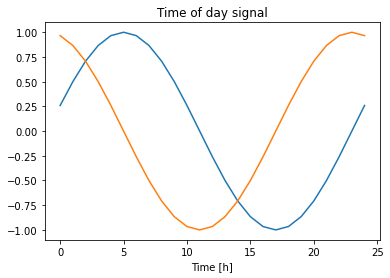

In [102]:
# CA
# Time of day - 24 hours in a day
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

Text(0.5, 1.0, 'Time of year signal')

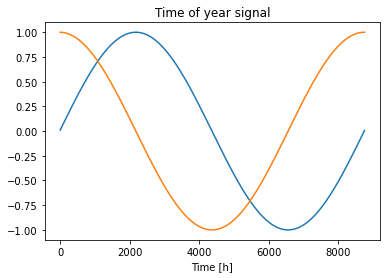

In [107]:
# CA
# Time of year - 8760 hours in one year
plt.plot(np.array(df['Year sin'])[:8761])
plt.plot(np.array(df['Year cos'])[:8761])
plt.xlabel('Time [h]')
plt.title('Time of year signal')

#### Splitting/Normalization

The data must now be split into training, validation, and test sets, and undergo normalization. I set up a function split_norm that will perform both procedures as carried out in the tutorial. The normalization method used in the tutorial is to subtract the mean and divide by the standard deviation of each feature. The selected split was kept the same as the tutorial, 70% train, 20% validation, 10% test. This can be changed in the function parameters. 

In [110]:
train_df, val_df, test_df, num_features = split_norm(df, train=0.7, val=0.2, test=0.1)

In [111]:
train_df

,p (mbar),T (degC),rh (%),Day sin,Day cos,Year sin,Year cos
5,0.945308,-1.982473,1.117102,0.366111,1.366069,-0.061052,1.428434
11,0.959770,-2.078372,1.044617,0.707200,1.224794,-0.060029,1.428424
17,0.986284,-2.070284,1.062738,1.000100,1.000059,-0.059006,1.428412
23,1.004362,-2.098014,1.008375,1.224850,0.707179,-0.057983,1.428400
29,1.061006,-2.165028,0.984214,1.366133,0.366112,-0.056960,1.428388
...,...,...,...,...,...,...,...
294353,0.169167,0.904892,0.947972,-0.955374,1.042725,-0.855026,-1.154613
294359,0.266787,0.879473,0.621793,-0.652949,1.254471,-0.855883,-1.154062
294365,0.217374,0.740824,1.086900,-0.306022,1.380734,-0.856739,-1.153511
294371,0.213759,0.710783,1.147303,0.061765,1.412909,-0.857595,-1.152959


In [112]:
num_features

7

### 2.2.2  RNN design

As we wish to predict the weather for two days (48 hours) into the future, we will use a multi time step model. This model will learn from a certain range of previous data, and then aim to predict the weather for a number of hours into the future. It is different to a single step model as we wish for a sequence of 48 hours to be predicted, and not just a single time step. 

The model selected here is the single-shot RNN model from the tutorial. This means that the model will predict weather for all 48 hours of the future in one go, based on the data from a range of previous hours. 

It is also a multi-output model, predicting future values for all of the features in the subsetted dataframe. 

Starting simple, we will aim to predict 48 hours into the future, given 48 hours of the past. 

To do this we must first generate the correct window object, which will be a set of future predictions based on a window of previous consecutive samples from the data. OUT_STEPS corresponds to the sequence of future values we wish to predict (48 hours) and the input_width refers to the number of previous hours to base this prediction off (48 hours). This window will be generated for the training, validation and testing data. Counting from 0, we can see tha the window size is 96 (48+48). The green label dots are the 'target' values for the prediction.

Total window size: 96
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label indices: [48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
Label column name(s): None

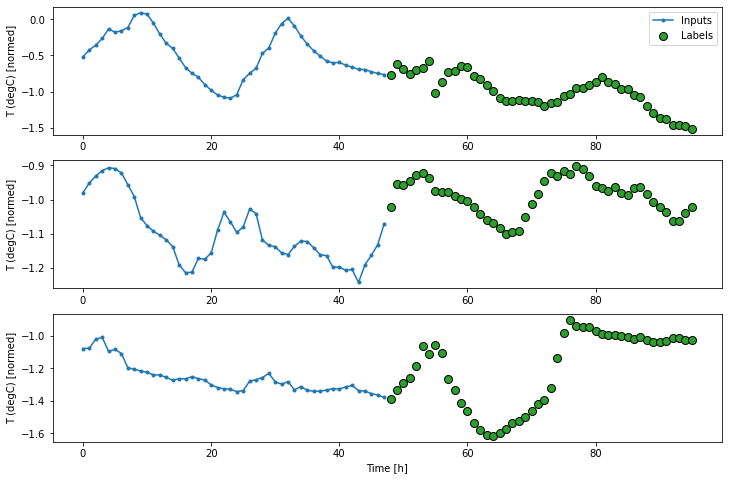

In [114]:
OUT_STEPS = 48 # hours (time steps) of the future being predicted 

multi_window = WindowGenerator(input_width=48,
                              label_width=OUT_STEPS,
                               shift=OUT_STEPS,
                              train_df=train_df, 
                               val_df=val_df, 
                               test_df=test_df)

multi_window.plot(plot_col='T (degC)') # plot just the temperature column below
multi_window

### 2.2.3 Building the model

Here, the layers are being stacked sequentially, using the tf.keras.Sequential() function, which takes the list of layers as input and bundles them together as a simple network, one layer after another. I have made this model building process into a function, in order to test other paramters more effectively downstream.

##### Layer 1 - LSTM  layer
The first layer in the model is a LSTM layer, which stands for Long short-term memory. LSTM networks are a form of RNN that comprises 6 algorithmic equations and is considered the gold standard for RNNs. LSTM avoids the 'shrink or explode' gradient problem that is often observed with basic RNNs when dealing with matrix products of very high order. LSTM networks are able to process individual data points, but can also process sequential data consisting of multiple data points. This makes LSTM very sutiable as a RNN network when making predcitions based on time series data, such as weather measurements seen here. In this initial model, the number of units selected for this layer was 32, which was the same as the tutorial parameters. They say in the tutorial that larger values for lstm units results in overfitting. The return_sequences paramater is set to False, which sets the LSTM to be in single-shot format. This means that the model will predict weather for all 48 hours of the future in one single step, this being at the last time step.

##### Layer 2 - Dense hidden Layer
The next layer of the model is a dense hidden layer containing 48x7 nodes. Te dense layer is set up like this to allow the single-shot format to operate correctly, with the sequence of all features for the next 48 hours being predicted in one go. Keras.initializer.zeros() is used in order to make sure that the initial predicted changes are small and that the model can also converge more efficiently. 


##### Layer 3 - Reshape output layer
The final layer in the model is a reshape layer, which is used to ensure the output from the dense layer above is in the correct shape to match the desired output of the model (48, 7).

In [170]:
# CA
def make_lstm(units, OUT_STEPS, num_features):
        multi_lstm_model = tf.keras.Sequential([
        # Shape [batch, time, features] => [batch, lstm_units].
        # Adding more `lstm_units` just overfits more quickly.
        tf.keras.layers.LSTM(units, return_sequences=False),
        # Shape => [batch, out_steps*features].
        tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.keras.initializers.zeros()),
        # Shape => [batch, out_steps, features].
        tf.keras.layers.Reshape([OUT_STEPS, num_features])
        ])
        
        return multi_lstm_model


# change nodes in lstm layer
# change epochs
# change input hours

multi_lstm_model = make_lstm(units=32, OUT_STEPS=48, num_features=num_features)

### 2.2.4 Training the model

The model is trained on the train_df dataset using the compile_and_fit() function defined in the tutorial. The loss function output and mean_absolute_error were each displayed as default, so I changed this to the 'accuracy' metric within the function, as I was more familiar with this metric. 

The model performs well, generating an accuracy of ~75% and a validation accuracy of ~76%. 


In [171]:
history = compile_and_fit(multi_lstm_model, multi_window)

#IPython.display.clear_output()

1531/1531 [==============================] - 37s 23ms/step - loss: 0.2051 - accuracy: 0.7467 - val_loss: 0.1481 - val_accuracy: 0.7576


The test performed on the validation subset of data can be observed as a standalone test and the output saved in a dictionary.

In [172]:
original = {}
original['validation'] = multi_lstm_model.evaluate(multi_window.val)

436/436 [==============================] - 4s 8ms/step - loss: 0.1481 - accuracy: 0.7576


### 2.2.5 Testing the model

To fully assess the model performance, it is now tested on the testing data, this time producing another reasonably good accuracy level of >78%.

In [173]:
original['testing'] = multi_lstm_model.evaluate(multi_window.test)

217/217 [==============================] - 2s 8ms/step - loss: 0.1240 - accuracy: 0.7766


The 48 hour predictions for the temperature data across the train, validation and testing data is displayed below.

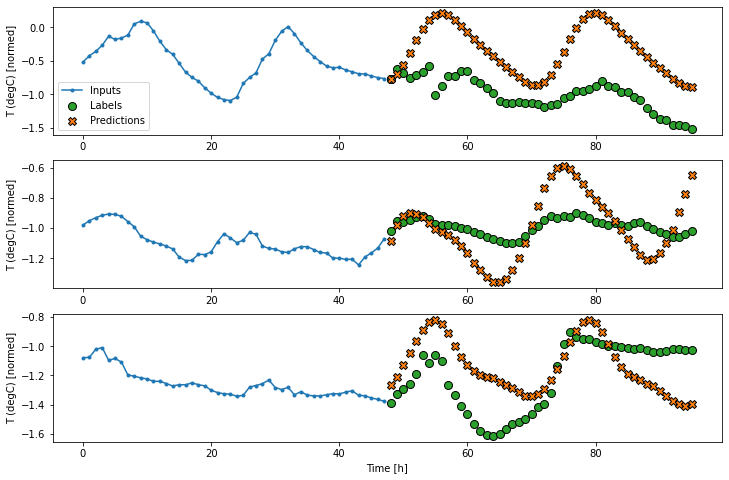

In [127]:
multi_window.plot(multi_lstm_model, plot_col='T (degC)')

The accuracy measures to what extent the prediction values differ from the green label 'target' values. A consistent training and valdiation accuracy of over 75% and a testing accuracy of ~78% is a reasonably good result overall. This was also achieved using only 48 hours of previous weather data, one epoch and 32 LSTM units, so we can now take a look and see how changing certain parameters affect the accuracy level.

### 2.2.6 Testing different paramaters

Firstly, let's change the number of lstm units and see how the prediction accuracy is affected. Again, we will be predicting 48 hours into the future based on 48 hours of the past, using a single-shot, multi-output lstm RNN. The same window will therefore be used.

#### Using 128 LSTM units

In [144]:
# CA
# Using 128 lstm units

multi_128_model = make_lstm(units=128, OUT_STEPS=48, num_features=num_features)

model_128 = {}

compile_and_fit(multi_128_model, multi_window)

1531/1531 [==============================] - 51s 32ms/step - loss: 0.1637 - accuracy: 0.7844 - val_loss: 0.1408 - val_accuracy: 0.7710


In [145]:
model_128['validation'] = multi_128_model.evaluate(multi_window.val)

436/436 [==============================] - 5s 10ms/step - loss: 0.1408 - accuracy: 0.7710


In [146]:
model_128['testing'] = multi_128_model.evaluate(multi_window.test)

217/217 [==============================] - 2s 10ms/step - loss: 0.1217 - accuracy: 0.7818


#### Using more hours of past weather data - 1 week of data and 32 LSTM units

Next, let's change the window size and see how the prediction accuracy is affected. Now we will be predicting 48 hours into the future based on 168 hours of the past, using a single-shot, multi-output lstm RNN. A new window must be created.

In [148]:
# CA
# Using a window size of 1 week 
OUT_STEPS = 48

week_window = WindowGenerator(input_width=7*24,
                              label_width=OUT_STEPS,
                               shift=OUT_STEPS,
                              train_df=train_df, 
                               val_df=val_df, 
                               test_df=test_df)

multi_week = make_lstm(units=32, OUT_STEPS=48, num_features=num_features)

week_model = {}

compile_and_fit(multi_week, week_window)

1527/1527 [==============================] - 105s 67ms/step - loss: 0.2046 - accuracy: 0.7490 - val_loss: 0.1479 - val_accuracy: 0.7602


In [149]:
week_model['validation'] = multi_week.evaluate(week_window.val)

432/432 [==============================] - 8s 18ms/step - loss: 0.1479 - accuracy: 0.7602


In [150]:
week_model['testing'] = multi_week.evaluate(week_window.test)

213/213 [==============================] - 4s 20ms/step - loss: 0.1230 - accuracy: 0.7879


#### Using a larger number of Epochs - 5

As the original model runs quite quickly, we should test out a larger number of epochs and see how the accuracy changes. Below I will use 5 epochs instead of one. 

This is the same as the original model, only the number of epochs are changing. The original window is being used also. 

In [151]:
# CA
# Using 5 epochs with the original model

epoch5_model = make_lstm(units=32, OUT_STEPS=48, num_features=num_features)

epoch_5 = {}

compile_and_fit(epoch5_model, multi_window, epochs=5)

Epoch 1/5
1531/1531 [==============================] - 37s 24ms/step - loss: 0.2047 - accuracy: 0.7479 - val_loss: 0.1453 - val_accuracy: 0.7617
Epoch 2/5
1531/1531 [==============================] - 35s 23ms/step - loss: 0.1392 - accuracy: 0.8079 - val_loss: 0.1403 - val_accuracy: 0.7720
Epoch 3/5
1531/1531 [==============================] - 34s 22ms/step - loss: 0.1346 - accuracy: 0.8144 - val_loss: 0.1375 - val_accuracy: 0.7782
Epoch 4/5
1531/1531 [==============================] - 35s 23ms/step - loss: 0.1316 - accuracy: 0.8171 - val_loss: 0.1365 - val_accuracy: 0.7799
Epoch 5/5
1531/1531 [==============================] - 39s 26ms/step - loss: 0.1295 - accuracy: 0.8184 - val_loss: 0.1367 - val_accuracy: 0.7819


In [152]:
epoch_5['validation'] = epoch5_model.evaluate(multi_window.val)

436/436 [==============================] - 4s 8ms/step - loss: 0.1367 - accuracy: 0.7819


In [153]:
epoch_5['testing'] = epoch5_model.evaluate(multi_window.test)

217/217 [==============================] - 2s 8ms/step - loss: 0.1127 - accuracy: 0.8011


### Comparing results

Comparing the loss function output and both validation and testing accuracy across the 4 different models.

In [174]:
# CA
for key in ['validation', 'testing']:
    print(key.upper(), '\n')
    print('Original Model:')
    print(original[key], '\n')
    print('Using 128 LSTM units:')
    print(model_128[key], '\n')
    print('Using 1 week of data:')
    print(week_model[key], '\n')
    print('Using 5 epochs:')
    print(epoch_5[key])
    print()

VALIDATION 

Original Model:
[0.14811517298221588, 0.7575609087944031] 

Using 128 LSTM units:
[0.14081677794456482, 0.7710458040237427] 

Using 1 week of data:
[0.14785894751548767, 0.7602121233940125] 

Using 5 epochs:
[0.13667921721935272, 0.7818582653999329]

TESTING 

Original Model:
[0.12402947247028351, 0.7765576243400574] 

Using 128 LSTM units:
[0.1216999962925911, 0.7818088531494141] 

Using 1 week of data:
[0.12302196770906448, 0.7878525853157043] 

Using 5 epochs:
[0.11267759650945663, 0.8011478781700134]



Overall, each of the changes slightly improved on the prediction accuracy of the original model, with the biggest improvement resulting from a change in epochs from 1 to 5. Changing the LSTM units from 32 to 128 performed similarly well, but I would be careful if making this nay higher, as it could lead to overfitting and a lengthy computation time. Changing to 1 week of input data resulted in very slight improvement, but an increase in computation time. Therefore, of these models, the best parameters for acheiving a higher prediction accuracy appeared to be 32 LSTM units, a 96 hour window (48 hours of past, 48 hours in future) and 5 epochs when fitting.

## 2.3. Cork Weather Data 

In [52]:
cork_df = pd.read_csv('Cork_hrly.csv')

/tmp/ipykernel_14370/736252453.py:1: DtypeWarning: Columns (8,9,18) have mixed types. Specify dtype option on import or set low_memory=False.
  cork_df = pd.read_csv('Cork_hrly.csv')


In [53]:
cork_df = cork_df[['date','rain', 'temp', 'wdsp', 'sun']]

In [54]:
cork_df

,date,rain,temp,wdsp,sun
0,01-jan-2012 00:00,0.0,9.5,14,0.0
1,01-jan-2012 01:00,0.0,9.7,15,0.0
2,01-jan-2012 02:00,0.6,9.2,15,0.0
3,01-jan-2012 03:00,1.7,8.5,15,0.0
4,01-jan-2012 04:00,0.0,8.9,13,0.0
...,...,...,...,...,...
89251,07-mar-2022 19:00,0.0,4.9,4,0.0
89252,07-mar-2022 20:00,0.0,4.8,3,0.0
89253,07-mar-2022 21:00,0.0,5.2,4,0.0
89254,07-mar-2022 22:00,0.0,5.0,2,0.0


In [55]:
cork_df.isnull().sum()

date    0
rain    0
temp    0
wdsp    0
sun     0
dtype: int64

In [56]:
date_time = pd.to_datetime(cork_df.pop('date'))

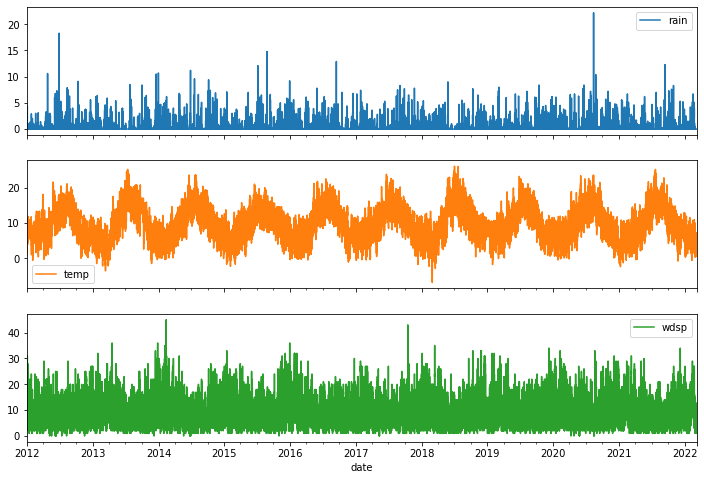

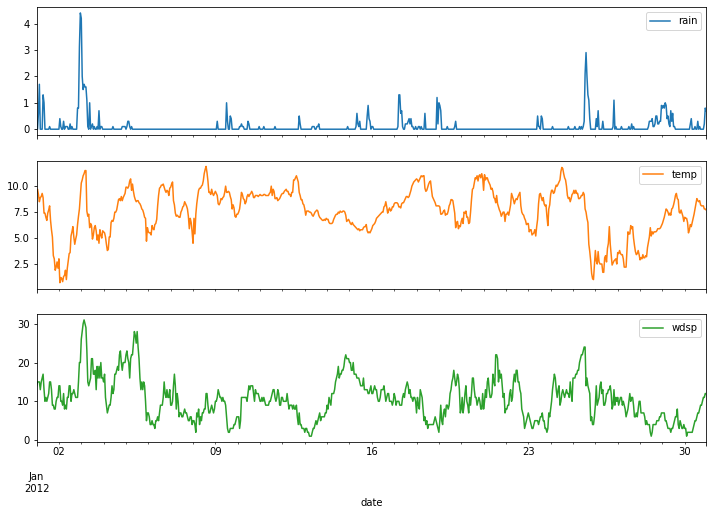

In [62]:
plot_cols = ['rain', 'temp', 'wdsp']
plot_features = cork_df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True, figsize=(12,8))

plot_features = cork_df[plot_cols][:720]
plot_features.index = date_time[:720]
_ = plot_features.plot(subplots=True, figsize=(12,8))


In [63]:
cork_df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
rain,89256.0,0.147261,0.560882,0.0,0.0,0.0,0.0,22.2
temp,89256.0,9.895728,4.478737,-6.9,6.7,9.8,13.1,26.2
wdsp,89256.0,9.729206,5.131411,0.0,6.0,9.0,13.0,45.0
sun,89256.0,0.164648,0.326077,0.0,0.0,0.0,0.1,1.0


In [64]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [65]:
day = 24*60*60
year = (365.2425)*day

cork_df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
cork_df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
cork_df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
cork_df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

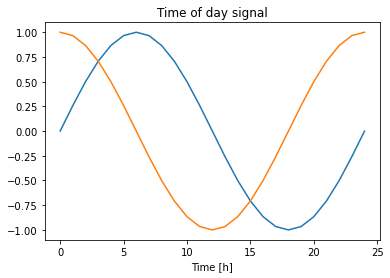

In [66]:
plt.plot(np.array(cork_df['Day sin'])[:25])
plt.plot(np.array(cork_df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

In [72]:
train_df, val_df, test_df, num_features = split_norm(cork_df)

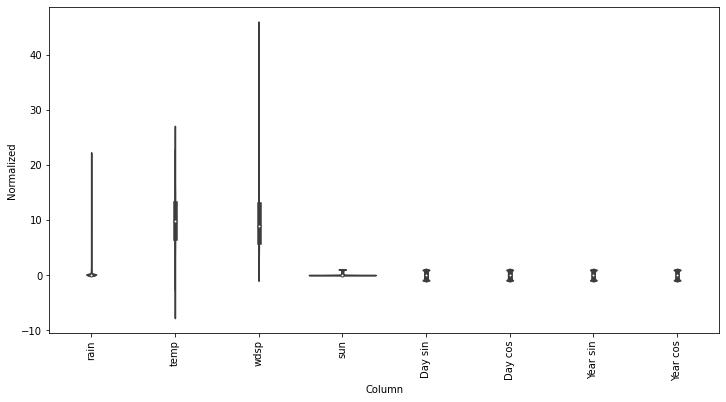

In [74]:
df_std = (cork_df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(cork_df.keys(), rotation=90)

<MapDataset shapes: ((None, 48, 8), (None, 48, 8)), types: (tf.float32, tf.float32)>

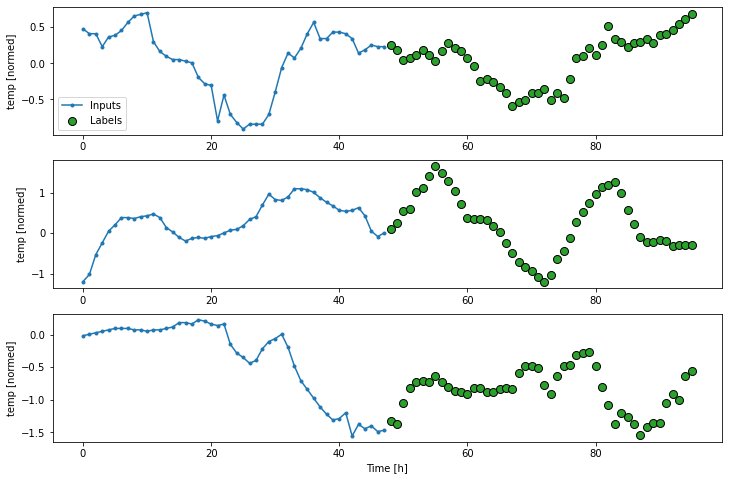

In [420]:
OUT_STEPS = 48
multi_window = WindowGenerator(input_width=48,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window.train

In [302]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.keras.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()


In [303]:
multi_val_performance = {}
multi_performance = {}
multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)


555/555 [==============================] - 3s 5ms/step - loss: 0.3763 - mean_absolute_error: 0.2814


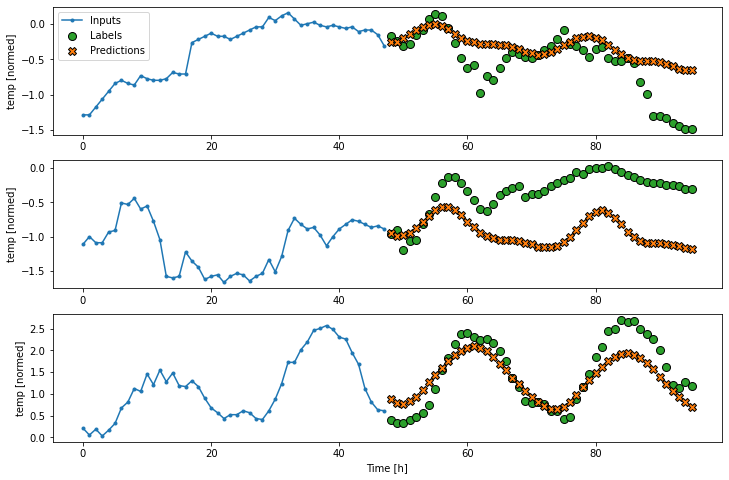

In [307]:
multi_window.plot(multi_lstm_model, plot_col='temp')

In [298]:
multi_val_performance

{'LSTM': [0.3770397901535034, 0.28050655126571655]}

In [299]:
multi_performance

{'LSTM': [0.3178291916847229, 0.2658080756664276]}